<a href="https://colab.research.google.com/github/Clinton-Nyaore/PLP_Project/blob/main/PLP_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is my PLP final project.**

It is a **deep learning project** using Python's Framework i.e **Pytorch** to classify types of clothing. It uses a MNIST Fashion torchvision dataset.

I was influenced by Fashion websites and thought to do a project that will help the customers to navigate through items which are categorized by this model. This will improve their experience which will make them like the site.

*Below are the steps I took to create the model.*

1. Download the training and testing datasets through torchvision and load them 

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
import torch.nn.functional as F

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

2. Explore the data and plot one image for viewing 

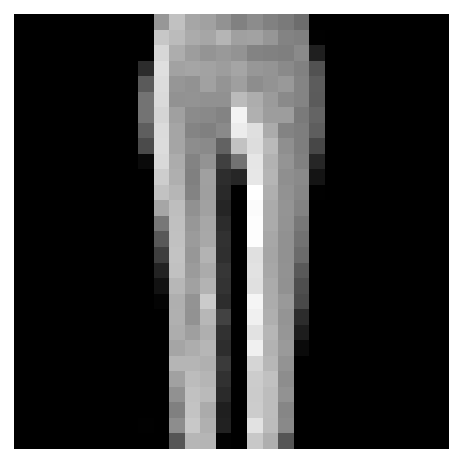

In [ ]:
image, label = next(iter(trainloader))

plt.imshow(image[0].numpy().squeeze(), cmap="Greys_r");
plt.axis("off");

3. Building the network

In [ ]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):

    # Flatten the images
    x = x.view(x.shape[0], -1)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim=1)

    return x

4. Train and validate the network

In [ ]:
# Define the network, define the criterion and optimizer

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Train the network

epochs = 5
steps = 0
train_losses, test_losses = [], []

for e in range(epochs):
  running_loss = 0

  for images, labels in trainloader:
    log_preds = model(images)
    loss = criterion(log_preds, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  else:

    test_loss = 0
    accuracy = 0
    
    with torch.no_grad():

      for images, labels in testloader:
        log_preds = model(images)
        test_loss += criterion(log_preds, labels)

        log_preds = torch.exp(log_preds)
        top_p, top_class = log_preds.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))

    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

    print("Epoch {}/{} ... ".format(e+1, epochs),
          "Training Loss : {:.3f} ... ".format(running_loss/len(trainloader)),
          "Test Loss : {:.3f} ... ".format(test_loss/len(testloader)),
          "Test Accuracy : {:.3f}".format(accuracy/len(testloader)))




Epoch 1/5 ...  Training Loss : 0.517 ...  Test Loss : 0.427 ...  Test Accuracy : 0.844
Epoch 2/5 ...  Training Loss : 0.393 ...  Test Loss : 0.395 ...  Test Accuracy : 0.855
Epoch 3/5 ...  Training Loss : 0.356 ...  Test Loss : 0.420 ...  Test Accuracy : 0.849
Epoch 4/5 ...  Training Loss : 0.335 ...  Test Loss : 0.383 ...  Test Accuracy : 0.868
Epoch 5/5 ...  Training Loss : 0.318 ...  Test Loss : 0.396 ...  Test Accuracy : 0.861


5. Plot the learning curve to identify overfitting and underfitting

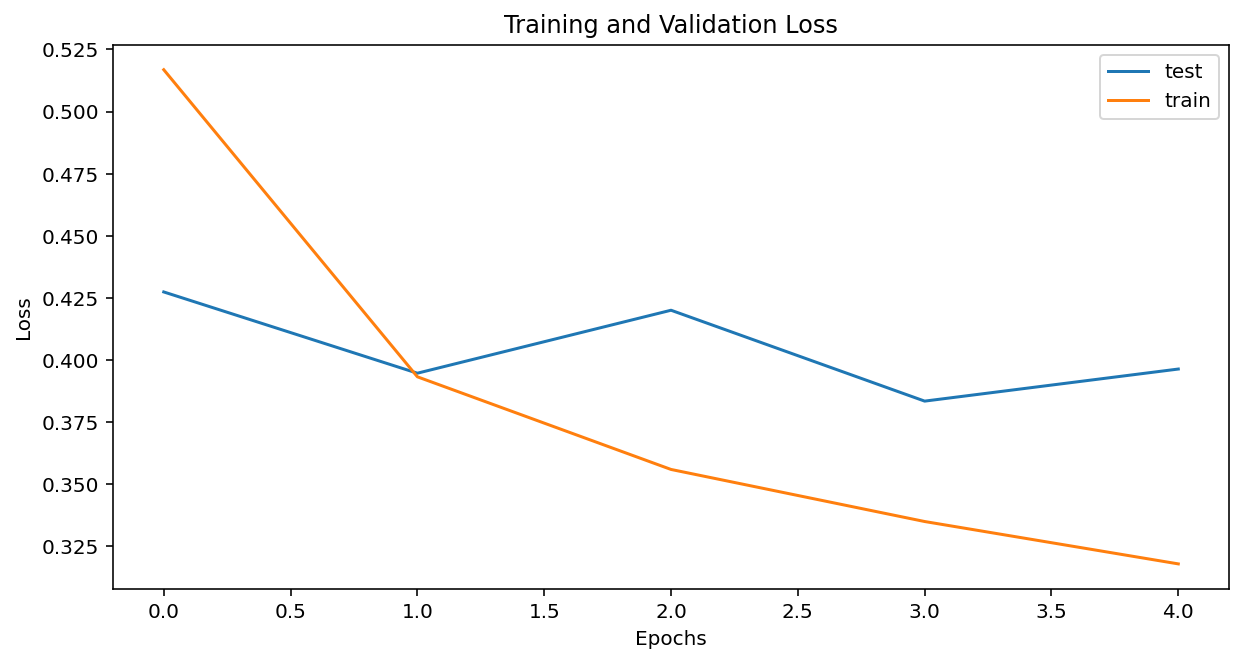

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(test_losses, label="test")
plt.plot(train_losses, label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

6. Lets now make predictions to see how well our model classifies the data not used in training.

In [ ]:

def predict(image_path, model):
  with torch.no_grad():
    loss = 0
    log_preds = model(images)
    loss += criterion(log_preds, labels)
    
    preds = torch.exp(log_preds)
    top_p, top_class = log_preds.topk(1, dim=1)
    probs, classes = top_p, top_class
    probs, classes = sum(probs.numpy().tolist(), []), sum(classes.numpy().tolist(), [])
    results = print('Probs: ', np.sort(probs)[::-1][:5], '\nTop Classes : ', np.sort(classes)[::-1][:5])
    return results

predict(images[1], model)

Probs:  [-3.95767020e-05 -3.35279532e-04 -2.15833751e-03 -6.65673334e-03
 -9.10404976e-03] 
Top Classes :  [8 7 7 7 6]


7. Plotting predictions on test set


The Predicted class is :  Ankle Boot





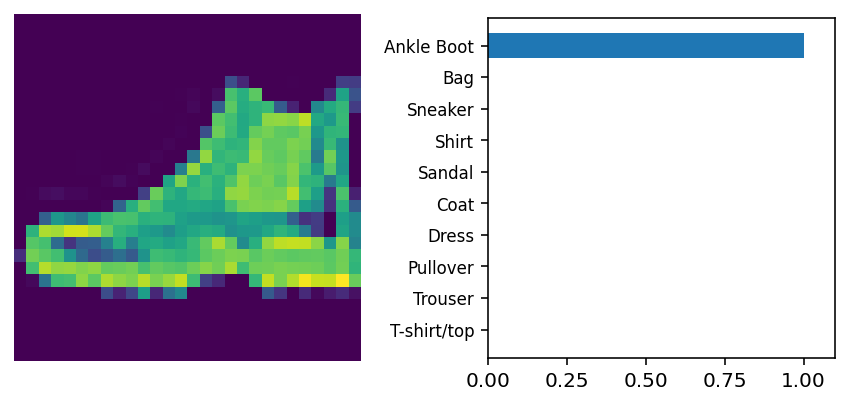

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test out your network

dataiter = iter(testloader)
images, labels = dataiter.next()

 # Resize the image to 1D vector
img = images[0]
img = img.resize_(1, 784)

# Use softmax to get class probabilities
s_ps = torch.exp(model(img))

# Now lets plot the image and the predictions side to side

def plot_preds(img, s_ps):

  s_ps = s_ps.data.numpy().squeeze()

  fig, (ax1, ax2) = plt.subplots(figsize=(6,10), ncols=2)

  ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
  ax1.axis("off")

  ax2.barh(np.arange(10), s_ps)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(10))
  ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');

  ax2.set_xlim(0, 1.1)

  plt.tight_layout()

plot_preds(img, s_ps)

class_labels = ['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot']

print("\nThe Predicted class is : ", class_labels[s_ps.data.numpy().argmax()])
print("\n\n")

Now our model works well and is ready to be saved and be used by any website